                     count
Genres                    
Adventure              734
RPG                    375
Shooter                265
Platform               243
Indie                  207
Puzzle                 133
Strategy               117
Brawler                109
Simulator               95
Turn Based Strategy     71


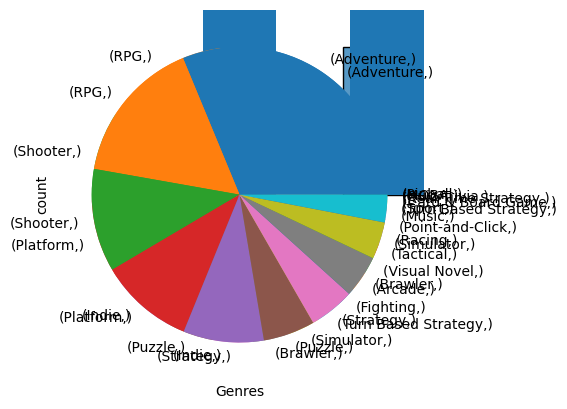

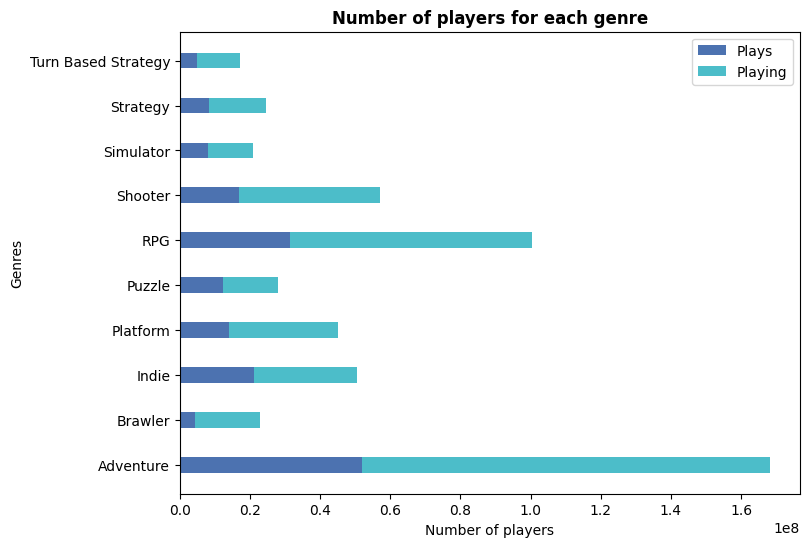

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from dateutil.parser import parse
filepath = "/Users/Shay/Documents/BCS/Programming -2.0/exercises/07-data-processing/games.csv"

data = pd.read_csv(filepath, index_col=0)
data.head()
data.shape


#replace missing values
mean_rating = data['Rating'].mean()
data['Rating'] = data['Rating'].replace(np.nan, mean_rating)
data['Team'] = data['Team'].replace(np.nan, "Unknown")
data['Summary'] = data['Summary'].replace(np.nan, "Unknown")
total_null = data.isnull().sum().sort_values(ascending=False)

percent_null = (total_null/data.isnull().count()*100).sort_values(ascending=False)
#print(percent_null.round(2))

duplicates = data[data.duplicated()]
duplicates.head()
data = data.drop_duplicates()
data.shape

# create a datetime object with the current time
dt = datetime.now()

# convert the datetime object to a string in the format 'Abbreviated Month Day, Year'
dt_str = dt.strftime('%b %d, %Y')

# replace the TBD dates with the current date string
data['Release Date'] = data['Release Date'].str.replace('releases on TBD', dt_str)

data['Release Date'] = pd.to_datetime(data['Release Date'], errors='coerce')#convert to proper format

data['Day'] = data['Release Date'].dt.day
data['Month'] = data['Release Date'].dt.strftime('%b')
data['Year'] = data['Release Date'].dt.year
data['Week_day'] = data['Release Date'].dt.day_name() # parenthesis important


#replace values with k
data['Times Listed'] = data['Times Listed'].str.replace('K', '').astype(float) * 1000
data['Number of Reviews'] = data['Number of Reviews'].str.replace('K', '').astype(float) * 1000
data['Plays'] = data['Plays'].str.replace('K', '').astype(float) * 1000
data['Playing'] = data['Playing'].str.replace('K', '').astype(float) * 1000
data['Backlogs'] = data['Backlogs'].str.replace('K', '').astype(float) * 1000
data['Wishlist'] = data['Wishlist'].str.replace('K', '').astype(float) * 1000

#explode columns
#The ast.literal_eval() function is typically used to safely evaluate strings containing Python expressions, such as lists, dictionaries, etc. However, if the strings in your "Team" column are not formatted as valid Python expressions, it will raise an error.

data['Genres'] = data['Genres'].apply(lambda x: ast.literal_eval(x))

# create a sample DataFrame with a column containing multiple values
df_genres = pd.DataFrame({
    'Title': data['Title'].tolist(),
    'Genres': data['Genres'].tolist()
})
# use the explode method to transform the 'Team' column
df_genres = df_genres.explode('Genres')


#plotting
top_rating = data[['Title','Rating']].sort_values(by = 'Rating', ascending = False)
sns.histplot(data = data['Rating'])

#plt.show()

#genre distribution
list_genres = pd.DataFrame(df_genres['Genres'])
count_genres = list_genres.value_counts()
plot_genres = count_genres.plot(kind = 'bar')


plot_genres = count_genres.plot(kind='pie')
# plt.show()

genre_counts = pd.DataFrame(list_genres.value_counts().rename_axis('unique_values'))
#plot = genre_counts.plot(kind = 'pie', labels = None, y='count', figsize=(10, 10))

#top genre pie chart
shortlist_genres = pd.DataFrame(list_genres.value_counts().head(10))

shortlist_plot = list_genres.value_counts().head(10).plot(kind='pie')

print(shortlist_genres)

# create a sample DataFrame with a column containing multiple values
plays_genre_df = pd.DataFrame({
    'Title': data['Title'].tolist(),
    'Genres': data['Genres'].tolist(),
    'Plays': data['Plays'].tolist(),
    'Playing': data['Playing'].tolist()
})
# use the explode method to transform the 'Genres' column
plays_genre_df = plays_genre_df.explode('Genres')

top10genres = ['Adventure','RPG','Shooter','Platform','Indie','Puzzle','Strategy','Brawler','Simulator','Turn Based Strategy']

plays_genre_df = plays_genre_df.groupby('Genres')[['Plays', 'Playing']].sum().reset_index()
plays_genre_df = plays_genre_df.loc[plays_genre_df['Genres'].isin(top10genres)]

index = plays_genre_df['Genres'].tolist()
value1 = plays_genre_df['Plays'].tolist()
value2 = plays_genre_df['Playing'].tolist()



value2 = pd.to_numeric(value2)

# Create a horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
# Plot bars for "Plays"
bar1 = ax.barh(index, value1, bar_width, label='Plays', color='#4c72b0')
# Plot bars for "Playing" stacked on top of "Plays"
bar2 = ax.barh(index, value2, bar_width, left=value1, label='Playing', color='#4cbdc9')


# Add labels and legend
ax.set_xlabel('Number of players')
ax.set_ylabel('Genres')
ax.set_title('Number of players for each genre', fontweight='bold')
ax.legend(loc='upper right')


plt.show()